## Neural Networks for Longitudinal Data Analysis

# Setup

## Load/install packages

In [1]:
## Install/load pacman for help with package loading
install.packages('pacman')
library(pacman)

## Load/install packages
pacman::p_load(
    ## Needed for data pre-processing and modeling 
    dplyr, tidyverse, readxl, padr, gridExtra, caret, tictoc, 

    ## Data pre-processing only
    rsample, lubridate, fastDummies, Lahman , 

    ## Modeling only
    keras, tensorflow  
    )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


padr installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


gridExtra installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’



caret installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


tictoc installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘future’, ‘globals’, ‘furrr’



rsample installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


fastDummies installed

Installing package into ‘/usr/local/lib/R/sit

## Set parameters

In [0]:
## Define random seed
random_seed = 100

## Filtering criteria for Baseball player example
min_plate_appearances = 85 # suggestion from Jimmy E. to require PA > 100 to focus on hitters
min_year = 1916 # earliest year to include so that stadium attendance is captured.

## Percents of data to include in training, testing, and validation dataframes
pct_train = .80
pct_test = .50 * (1 - pct_train)
pct_valid = pct_test

## Number of periods to look back (for attributes) and forward (for prediction)
look_back = 3
look_forward = 1
min_length = look_back + look_forward
#max_length = 20
#above_pct = 0.50


## Slash line outcomes
slash_line_outcomes = c('Batting_BattingAverage', 'Batting_OnBasePct', 'Batting_SlugPct') 
slash_line_outcomes_fmt = slash_line_outcomes %>% gsub('Batting_', '', .)

## Download files from Github

In [0]:
## Create a subfolder called 'R' to hold R scripts downloaded from demo Github repo
dir.create('R')

In [0]:
## repo_path: direct path to Github repository
## filename: Name of file in the Github repo path
get_file_from_github = function(repo_path, filename) {
    url = paste0(repo_path, filename)
    destfile = paste0('R/', filename)
    download.file(url=url, destfile=destfile)
    message(paste('Successfully downloaded', filename))
}

In [7]:
baseball_demo_repo_path = "https://raw.githubusercontent.com/sydeaka/neural_networks_longitudinal/master/R/"

#get_file_from_github(repo_path = baseball_demo_repo_path, '00-config.R')
get_file_from_github(repo_path = baseball_demo_repo_path, '01-data-processing_helper-functions.R')
get_file_from_github(repo_path = baseball_demo_repo_path, '02-create_modeling_dataset.R')
get_file_from_github(repo_path = baseball_demo_repo_path, '03-data-formatting.R')
get_file_from_github(repo_path = baseball_demo_repo_path, '04-modeling-helper-functions.R')

Successfully downloaded 01-data-processing_helper-functions.R

Successfully downloaded 02-create_modeling_dataset.R

Successfully downloaded 03-data-formatting.R

Successfully downloaded 04-modeling-helper-functions.R



## Source R scripts from Github

In [8]:
## Load helper functions used for data processing
source('R/01-data-processing_helper-functions.R')

Load miscellaneous helper functions



In [12]:
## Create baseball dataset used in demo
source('R/02-create_modeling_dataset.R')

Bring in data sources

Warning message:
“datetime variable does not vary for 3585 of the groups, no padding applied on this / these group(s)”
Apply plate appearances filter

Training/testing/validation split on player IDs



All players accounted for? TRUE 


Find players with correct number of plate appearances

Batting Stats table...

Export to CSV



In [13]:
## Put data in formats required for modeling
source('R/03-data-formatting.R')

Data pre-processing

Identify and select fields and features

Reorder columns

Get training, testing, and validation splits as individual dataframes



train split contains 19688 rows (80.34%) and 26 columns.
test split contains 4347 rows (17.74%) and 26 columns.
valid split contains 472 rows (1.93%) and 26 columns.


Normalize data to 0-1 range

Get attribute and target column IDs and names

Get attribute and target column numbers

Get rolling window samples for each data split



Processing train ...done.
Processing test ...done.
Processing valid ...done.


In [14]:
dat_train_scaled %>% head()

,playerID,idx,lgID,yearID,teamID,Batting_AtBats,Batting_Runs,Batting_BaseOnBalls,Batting_Hits,Batting_HomeRuns,⋯,Batting_Triples,Batting_RunsBattedIn,Batting_StolenBases,Batting_CaughtStealing,Batting_Strikeouts,Batting_IntentionalWalks,Batting_HitByPitch,Batting_SacrificeHits,Batting_Sacrifice_Flies,Batting_GroundedIntoDoublePlays
,<chr>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,aaronha01,0,NL,0.3725490,ML1,0.6202144,0.3276836,0.1206897,0.4961538,0.1780822,⋯,0.2307692,0.3750000,0.015384615,0.04761905,0.1748879,0.00000000,0.06,0.08955224,0.2105263,0.40625
2,aaronha01,0,NL,0.3823529,ML1,0.8254211,0.5932203,0.2112069,0.7192308,0.3698630,⋯,0.3461538,0.5760870,0.023076923,0.02380952,0.2735426,0.04166667,0.06,0.10447761,0.2105263,0.62500
3,aaronha01,0,NL,0.3921569,ML1,0.8361409,0.5988701,0.1594828,0.7615385,0.3561644,⋯,0.5384615,0.5000000,0.015384615,0.09523810,0.2421525,0.05000000,0.04,0.07462687,0.3684211,0.65625
4,aaronha01,0,NL,0.4019608,ML1,0.8453292,0.6666667,0.2456897,0.7538462,0.6027397,⋯,0.2307692,0.7173913,0.007692308,0.02380952,0.2600897,0.12500000,0.00,0.00000000,0.1578947,0.40625
5,aaronha01,0,NL,0.4117647,ML1,0.8238897,0.6158192,0.2543103,0.7461538,0.4109589,⋯,0.1538462,0.5163043,0.030769231,0.02380952,0.2197309,0.13333333,0.02,0.00000000,0.1578947,0.65625
6,aaronha01,0,NL,0.4215686,ML1,0.8667688,0.6553672,0.2198276,0.8500000,0.5342466,⋯,0.2692308,0.6684783,0.061538462,0.00000000,0.2421525,0.14166667,0.08,0.00000000,0.4736842,0.59375


In [15]:
## Load modeling functions
## Example function assumes you would like to consider models that feature:
##  (1) one or more Gated Recurrent Unit (GRU) layers
##  (2) one or more fully connected dense layers
##  (3) a final output layer with one node for each outcome you want to predict
## Feel free to play around with other architectures, replace GRU with LSTM, etc.
source('R/04-modeling-helper-functions.R')

Helper functions for modeling



## Set modeling parameters

In [0]:
## Named list of optimizers to consider in the hyperparameter grid
optimizers = list(adam = optimizer_adam, rmsprop = optimizer_rmsprop, sgd = optimizer_sgd)

## If we loss function doesn't decrease by at least this amouunt, 
##  drop the learning rate and/or impose early stopping
min_delta = length(target_col_names) * 0.001

## Hyperparameter grid. Generally, we would include more than one value for each parameter
## `random_fit` will randomly select values from this grid and use them to fit a model
params = list(
    num_dense_layers = c(1,2),      # Number of fully connected dense layers
    num_recurrent_layers = c(1,2),  # Number of GRU layers
    batch_size = c(85, 90, 100),    # Batch size
    num_dense_units = c(900, 800, 700),  # Number of units to incldue in the dense layer
    optimizer_name = names(optimizers),  # Name of the optimizers to consider
    dense_activation = c('relu'),        # Activation to use in the dense layers
    learning_rate = c(.00001, .00003, .00005),  # Learning rates
    lstm_nodes = c(1500),                       # Number of nodes in the recurrent layes
    lstm_dropout = c(0.10),                     # Dropout for recurrent layers
    num_epochs = 10,                     # Number of epochs
    alpha = c(0.5),                      # Alpha to use for leaky relu
    patience_lr = 4,                     # Number of iterations in which loss is allowed to not decrease before automatically reducing learning rate
    max_lr_reductions = 10,              # Maximum number of times to reduce the learning rate
    lr_reduce_factor = 0.60,             # New learning rate is this fraction of the previous learning rate
    min_delta_lr = min_delta,            # See note for min_delta above
    min_delta_es = min_delta,            # See note for min_delta above
    loss_weights = list(1.0, 1.0, 1.0),  # Weights for outcome-specific losses used to create overall loss 
    l1_term = c(0.0001),                 # Regularization term for L-1 regularization
    l2_term = c(0.0)                     # Regularizationt erm for L-2 regularization
)

## Set up the leaderboard and output file name

In [23]:
testing = F
leader = NULL
model_output = list()
output_csv = ifelse(testing==T, 'output_test.csv', paste0('modeling_output_', Sys.time(), '.csv'))
cat('Results saved to', output_csv, '\n')
set.seed(random_seed)

Results saved to modeling_output_2020-01-29 23:19:09.csv 


## Fit the model(s)

Random draw of parameter values

Reset some values for testing

Using the following parameters:



  num_dense_layers num_recurrent_layers batch_size num_dense_units
1                1                    1         85              10
  optimizer_name dense_activation learning_rate lstm_nodes lstm_dropout
1           adam             relu         3e-04         10          0.1
  num_epochs alpha patience_lr max_lr_reductions lr_reduce_factor min_delta_lr
1          2   0.5           4                10              0.6        0.003
  min_delta_es loss_weights l1_term l2_term patience_es nodes_last_layer
1        0.003      1, 1, 1   1e-04       0          42               10



Model # 1


Fit the model

Training started at  2020-01-29 23:19:17

Model has 1,213 parameters.



   user  system elapsed 
  7.043   0.251   5.948 


Warning message:
“Removed 16 rows containing missing values (geom_path).”
Warning message:
“Removed 17 rows containing missing values (geom_point).”


TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
Trained on 12,902 samples (batch_size=85, epochs=2)
Final epoch (plot to see history):
             loss: 1.348
    output_1_loss: 0.7217
    output_2_loss: 0.2599
    output_3_loss: 0.3557
         val_loss: 0.2211
val_output_1_loss: 0.06162
val_output_2_loss: 0.07494
val_output_3_loss: 0.07507
               lr: 0.0003 
7.389 sec elapsed


Training stopped at  2020-01-29 23:19:25 .

Summary dataframe containing selected parameter values and performance metrics



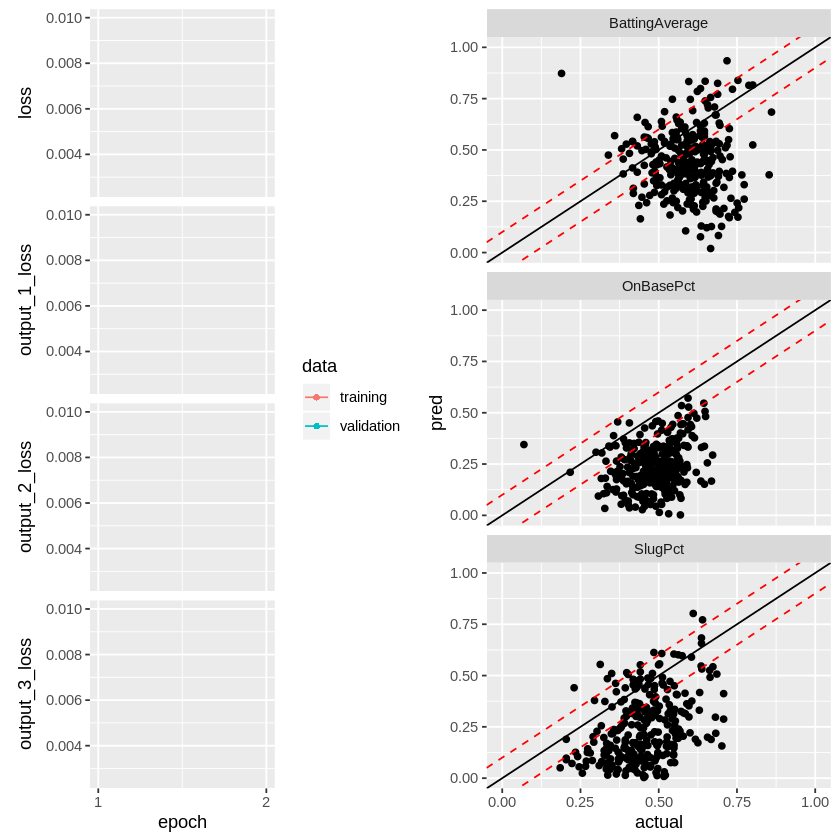

In [24]:
# First run is testing to make sure it works
random_fit(params=params, testing=T)

Random draw of parameter values

Using the following parameters:



  num_dense_layers num_recurrent_layers batch_size num_dense_units
1                1                    1         85             900
  optimizer_name dense_activation learning_rate lstm_nodes lstm_dropout
1           adam             relu         3e-04       1500          0.1
  num_epochs alpha patience_lr max_lr_reductions lr_reduce_factor min_delta_lr
1         10   0.5           4                10              0.6        0.003
  min_delta_es loss_weights l1_term l2_term patience_es
1        0.003      1, 1, 1   1e-04       0          42



Model # 2


Fit the model

Training started at  2020-01-29 23:20:40

Model has 8,216,703 parameters.



   user  system elapsed 
 35.587   7.007  35.850 


Warning message:
“Removed 53 rows containing missing values (geom_path).”


TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
Trained on 12,902 samples (batch_size=85, epochs=10)
Final epoch (plot to see history):
             loss: 0.2687
    output_1_loss: 0.07441
    output_2_loss: 0.07299
    output_3_loss: 0.06558
         val_loss: 0.08162
val_output_1_loss: 0.009163
val_output_2_loss: 0.006482
val_output_3_loss: 0.01122
               lr: 0.0003 
37.35 sec elapsed


Training stopped at  2020-01-29 23:21:18 .

Summary dataframe containing selected parameter values and performance metrics



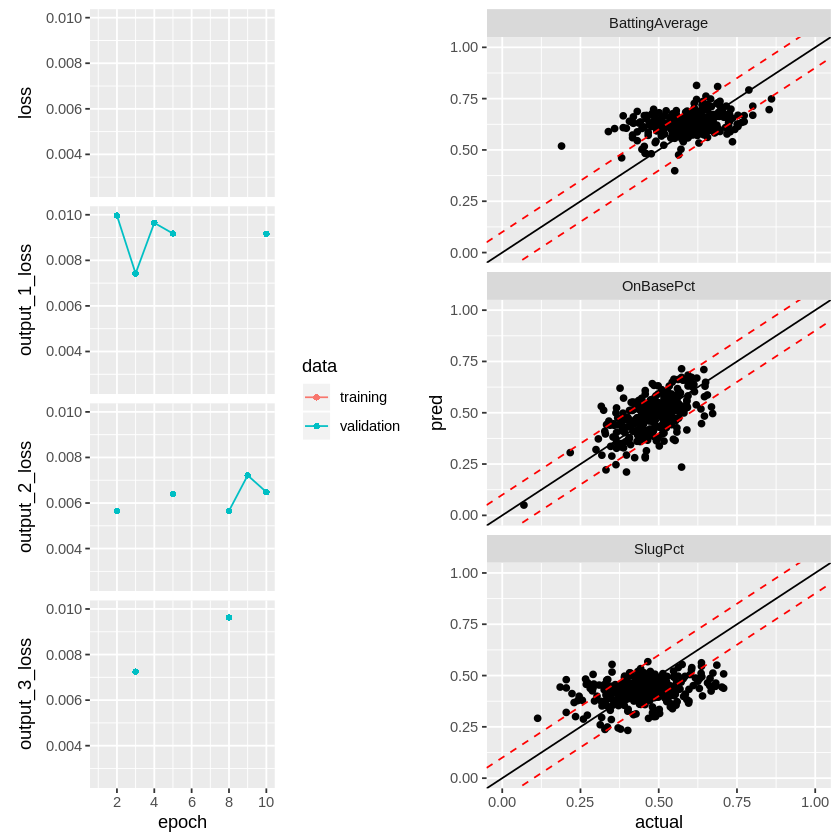

In [28]:
random_fit(params=params)

Random draw of parameter values

Using the following parameters:



  num_dense_layers num_recurrent_layers batch_size num_dense_units
1                1                    1         85             900
  optimizer_name dense_activation learning_rate lstm_nodes lstm_dropout
1           adam             relu         3e-05       1500          0.1
  num_epochs alpha patience_lr max_lr_reductions lr_reduce_factor min_delta_lr
1         10   0.5           4                10              0.6        0.003
  min_delta_es loss_weights l1_term l2_term patience_es
1        0.003      1, 1, 1   1e-04       0          42



Model # 3


Fit the model

Training started at  2020-01-29 23:22:06

Model has 8,216,703 parameters.



   user  system elapsed 
 35.564   6.861  35.861 


Warning message:
“Removed 56 rows containing missing values (geom_path).”


TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
Trained on 12,902 samples (batch_size=85, epochs=10)
Final epoch (plot to see history):
             loss: 0.5346
    output_1_loss: 0.1456
    output_2_loss: 0.1378
    output_3_loss: 0.1502
         val_loss: 0.1376
val_output_1_loss: 0.01072
val_output_2_loss: 0.02009
val_output_3_loss: 0.008688
               lr: 0.00003 
37.348 sec elapsed


Training stopped at  2020-01-29 23:22:44 .

Summary dataframe containing selected parameter values and performance metrics



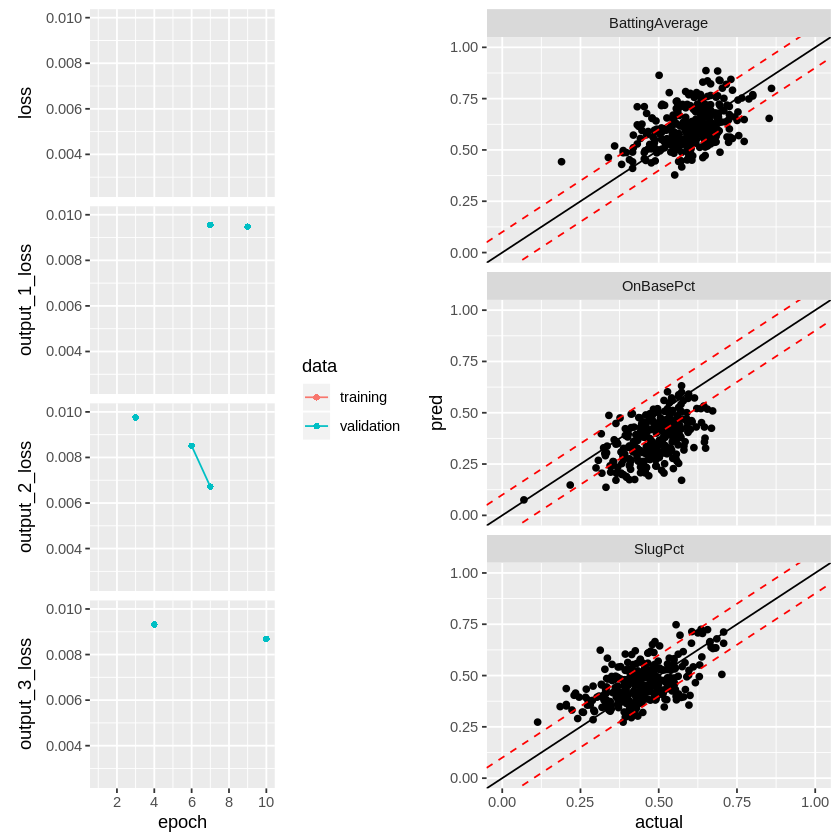

In [30]:
random_fit(params=params)

In [21]:
leader

model_num,num_dense_layers,num_recurrent_layers,batch_size,num_dense_units,optimizer_name,dense_activation,learning_rate,lstm_nodes,lstm_dropout,⋯,output_1_loss,output_2_loss,output_3_loss,val_loss,val_output_1_loss,val_output_2_loss,val_output_3_loss,lr,epoch_stop,outcomes
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1,85,10,adam,relu,3e-04,10,0.1,⋯,0.39951,0.3785,0.56531,0.50878,0.12642,0.21477,0.15201,3e-04,2,"Batting_BattingAverage,Batting_OnBasePct,Batting_SlugPct"
